# Housing Price Based on Features
by Collin Coakley

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
pd.options.mode.chained_assignment = None

# Project Topic / About the Project / Type of Problem
This project aims to predict housing prices by examining a number of factors. Central to this will be taking in a variety of factors, examining their impact on the overall price of the house, and predicting the cost of a house based on the existence of a combination of features. Because this is attempting to predict the price of a home, this is a **regression** problem.

# Project Topic / Goal of the Project

My motivation for this is that I am extremely interested in the housing market, specifically what makes a home more valuable and what makes a home less valuable. I want to use this project as a way to expose myself to some data about how identify the key aspects of a home that make it valuable so I can make informed decisions about buying a home.

Below, I perform initial exploratory data analysis to see how much data we have available, and to check the correlation between price and individual features in order to establish a hypothesis.

# Data Source, Description, and Size

Originally, I used a dataset from [Kaggle.com Housing Dataset](https://www.kaggle.com/datasets/ashydv/housing-dataset). Unfortunately, that dataset did not have any description about how the data was gathered, or where it was from. So, it was difficult/impossible to determine if the data was useful for a US housing market analysis, which is relevant to me since I live in the US. 

For my revised Part 2, I've identified a new data set that I wish to use for my final project: [A Competititon for House Prices Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). While I won't be following the exact rules of the competition for which this data was sourced, I will be using this data to estimate price using a variety of features.

## Acknowledgment; My Review of Another Student's Similar Project

I initially ran across the following data in my own search for my project. I reviewed this data and determined it had too many features for consideration of this project, so I chose to utilize a different data set in Part 1 of the project. Upon completing my initial proposal, I determined my dataset had a fundamental flaw: I did not know enough about the source data to determine how that data could be useful to me. I thought about revising my strategy to use the following data.

By pure chance, I reviewed a student's proposal that utilized this same data set for the same purpose. I had already seen the "Advanced Regression Techniques" dataset that I am now using, and spent time looking at it, including conceptualizing how I'd use the data and clean it, but some of the ideas reflected my thoughts were concretely included in the other student's Part 1 proposal. As such, I feel it is ethically right to acknowledge that, while the following analysis is my own, some of the conclusions reached and methods used do overlap.

## The Dataset

This dataset is described on Kaggle as "79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa..." See https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview.

I don't plan to use all 79 explanatory variables because I feel that would be unwieldy for the scope of this project. Furthermore, I feel that certain factors are more important to *me* as a first time home purchaser. For instance, I have small children, so I care a lot about storage space in a garage and backyard space so I can store toys for them to play with. My children also have many toys scattered throughout the house, so having a basement with a lot of room is a bonus to me; that is a feature I will pay more for. 

The train.csv data consists of 1459 homes, and has the following 81 columns, which include SalePrice:

In [2]:
housing = pd.read_csv('train.csv')
print("There are:", len(housing.columns),"columns of data:")
for i in range(len(housing.columns)):
    print(housing.columns[i])


There are: 81 columns of data:
Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


Of the above 81 columns, we are trying to find a regression model to predict one of these columns: SalePrice. Let's see the datatype for the columns to get an idea for what type of information the columns contain:

The following is a direct citation to the description of [the direct description in the Kaggle page (see citation)](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) for the columns:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

[Source.](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

Here are a few unique values in each column:

In [3]:
for col in housing.columns:
    print(housing[col].name, housing[col].unique()[:5])

Id [1 2 3 4 5]
MSSubClass [ 60  20  70  50 190]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [65. 80. 68. 60. 84.]
LotArea [ 8450  9600 11250  9550 14260]
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer']
OverallQual [7 6 8 5 9]
OverallCond [5 8 6 7 4]
YearBuilt [2003 1976 2001 1915 2000]
YearRemodAdd [2003 1976 2002 1970 2000]
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace']
Exterior2nd ['VinylSd' '

Many values seem to have meaning, but the Id column (first column) clearly is just a numerical sequence of houses in a 1459 houses in this data set. As such, we will discard the Id column. Likewise, we want to generalize this prediction model to the price of houses in general, not just in a specific neighborhood, so I will likewise throw out columns to and overly localizing the data such that it can't be extrapolated. This also explains why the data is described by the publisher as 79 explanatory variables, but there are 81 columns. 80 columns makes sense since the dependent variable is the price plus 79 explanatory variables.

Let's see the breakdown of different data types:

In [4]:
housing.drop('Id', axis=1, inplace=True)
housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
housing.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

# Data Cleaning

If I want to distill the information based on data type, such that the values remaining would give me square footage, lot size,  I would like to use int64 or float64 information since it will help me create a multivariate regression prediction for price on a sliding scale of features and price. Let's narrow our data to those with int64 or float64 data.

In [6]:
drop_cols = []
for col in housing.columns:
    if housing[col].dtype == 'object':
        drop_cols.append(col)
print(drop_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [7]:
housing.drop(drop_cols, axis=1, inplace=True)
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
housing.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

LotFrontage and GarageYrBlt obviously stand out as having more na or NaN values. As such, we'll systematically remove them from the feature list.

In [9]:
housing.drop(['LotFrontage','GarageYrBlt'],axis=1, inplace=True)

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

I'm going cut ut columns that I don't find relevant based on my needs, such as: `GrLivArea` because I don't plan to have anyone living in the garage; `MSSubClass`, `YearRemodAdd`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, and others that I don't care about because, for example, I don't need a finished basement, I just want to store toys and things there.

In [10]:
housing.drop(columns=['MSSubClass', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','GrLivArea'], inplace=True)


I'd also like a total square footage of the house, which is not provided, so I will synthesize the TotalBsmtSF, 1stFlrSF, and 2ndFlrSF to create that column:

In [11]:
housing['TotalSF'] = housing['TotalBsmtSF'] + housing['1stFlrSF'] + housing['2ndFlrSF']

In [12]:
housing.TotalSF

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: TotalSF, Length: 1460, dtype: int64

Finally, there are some features that columns that start with a number, such as `1stFlrSF`. I will rename these so that there isn't an issue when we go to build our model.

In [13]:
housing.rename(columns={"1stFlrSF": "FirstFlrSF", "2ndFlrSF" : "SecondFlrSF", "3SsnPorch" : "ThreeSsnPorch"}, inplace=True)

# Exploratory Data Analysis

In the following section, I will provide data analysis for  select features. Unfortunately, due to the number of features, it is not feasible to zoom in on all features in this Part 2. The core analysis will be completed in the final part 3 of the project.

For this section, I will focus on summary statistics that seem on the surface would have some correlation to price, but that will be explored further below.


## Correlation Matrix

Let's see how all of the data is correlated:

In [14]:
corr = housing.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision = 2)

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
LotArea,1.00,0.11,-0.01,0.01,0.26,0.30,0.05,0.00,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26,0.31
OverallQual,0.11,1.00,-0.09,0.57,0.54,0.48,0.30,-0.03,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79,0.67
OverallCond,-0.01,-0.09,1.00,-0.38,-0.17,-0.14,0.03,0.03,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08,-0.14
YearBuilt,0.01,0.57,-0.38,1.00,0.39,0.28,0.01,-0.18,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52,0.35
TotalBsmtSF,0.26,0.54,-0.17,0.39,1.00,0.82,-0.17,-0.03,0.31,-0.00,0.32,-0.05,0.05,-0.07,0.29,0.34,0.43,0.49,0.23,0.25,-0.10,0.04,0.08,0.13,-0.02,0.01,-0.01,0.61,0.83
FirstFlrSF,0.30,0.48,-0.14,0.28,0.82,1.00,-0.20,-0.01,0.24,0.00,0.38,-0.12,0.13,0.07,0.41,0.41,0.44,0.49,0.24,0.21,-0.07,0.06,0.09,0.13,-0.02,0.03,-0.01,0.61,0.80
SecondFlrSF,0.05,0.30,0.03,0.01,-0.17,-0.20,1.00,0.06,-0.17,-0.02,0.42,0.61,0.50,0.06,0.62,0.19,0.18,0.14,0.09,0.21,0.06,-0.02,0.04,0.08,0.02,0.04,-0.03,0.32,0.34
LowQualFinSF,0.00,-0.03,0.03,-0.18,-0.03,-0.01,0.06,1.00,-0.05,-0.01,-0.00,-0.03,0.11,0.01,0.13,-0.02,-0.09,-0.07,-0.03,0.02,0.06,-0.00,0.03,0.06,-0.00,-0.02,-0.03,-0.03,0.01
BsmtFullBath,0.16,0.11,-0.05,0.19,0.31,0.24,-0.17,-0.05,1.00,-0.15,-0.06,-0.03,-0.15,-0.04,-0.05,0.14,0.13,0.18,0.18,0.07,-0.05,-0.00,0.02,0.07,-0.02,-0.03,0.07,0.23,0.19
BsmtHalfBath,0.05,-0.04,0.12,-0.04,-0.00,0.00,-0.02,-0.01,-0.15,1.00,-0.05,-0.01,0.05,-0.04,-0.02,0.03,-0.02,-0.02,0.04,-0.03,-0.01,0.04,0.03,0.02,-0.01,0.03,-0.05,-0.02,-0.01


Looking at this plot, it shows that there is a wide variation of correlation between pairs of features. This indicates that there is no issue with collinearity between any of the features. There are some that have low correlation between with price, which may mean they have little to no impact in the predictive model for the dependent variable SalePrice. There are also some negative correlations with SalePrice, which may show that certain features are a detriment to the price. Some select features are highlighted below:

## OverallQual and OverallCond 

Now that we've looked at the correlation matrix, let's analyze to see how the quality and condition affect sale price.

We begin with SalePrice and OverallQual:

In [15]:
housing['SalePrice'].corr(housing['OverallQual'])


0.7909816005838051

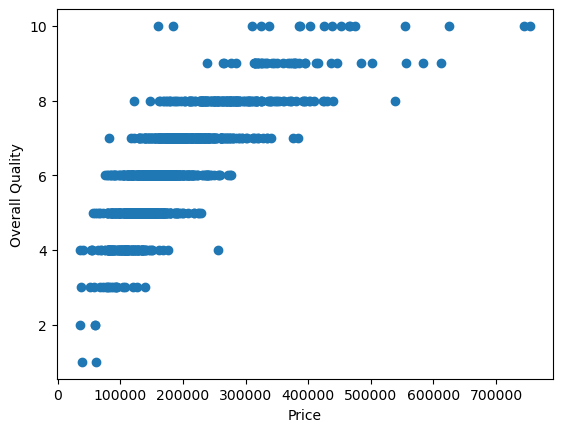

In [16]:
plt.scatter(housing['SalePrice'],housing['OverallQual'])
plt.xlabel('Price')
plt.ylabel('Overall Quality');

In [17]:
feature_train = housing[['SalePrice','OverallQual']]
model_trn = smf.ols(formula='SalePrice~OverallQual', data=feature_train).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.19e-313
Time:                        05:14:19   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, the higher the quality, the higher the entry price and max price. 

The R-Squared shows that 62.6% of price can be explained by the model There is a strong positive correlation between SalePrice and OverallQual, so it is definitely a good feature to consider in our model.

Next we check the correlation between SalePrice and OverallCond

In [18]:
housing['SalePrice'].corr(housing['OverallCond'])

-0.07785589404867806

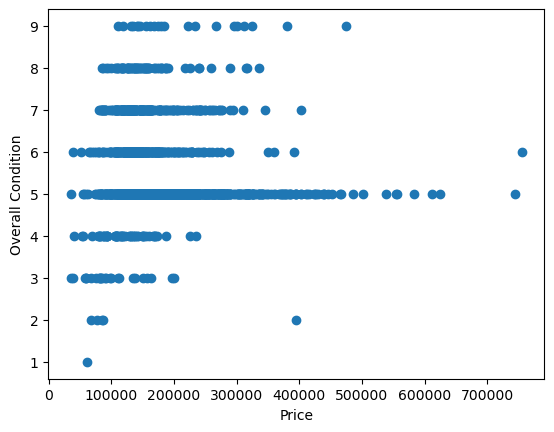

In [19]:
plt.scatter(housing['SalePrice'],housing['OverallCond'])
plt.xlabel('Price')
plt.ylabel('Overall Condition');

In [20]:
feature_train = housing[['SalePrice','OverallCond']]
model_trn = smf.ols(formula='SalePrice~OverallCond', data=feature_train).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.892
Date:                Tue, 09 May 2023   Prob (F-statistic):            0.00291
Time:                        05:14:19   Log-Likelihood:                -18540.
No. Observations:                1460   AIC:                         3.708e+04
Df Residuals:                    1458   BIC:                         3.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.119e+05   1.06e+04     19.997      0.000    1.91e+05    2.33e+05
OverallCond -5558.1154   1863.962     -2.982      0.003   -9214.449   -1901.782
==============================================================================
Omnibus:                      601.288   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3406.241
Skew:                           1.843   Prob(JB):                         0.00
Kurtosis:                       9.512   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interestingly, the OverallCond has a low, negative correlation with SalePrice. You can see in the scatter plot that the medium condition (5 in particular), there does not appear to be a consistent relationship between Price and Overall Condition. It seems Overall Condition is not a good metric for price. While it may have another function or intersect with other features, initial signs indicate it could be eliminated as uncorrelated data.

As you can also see with the R-Squared that the model does not explain variation in price.

## Year Built

As a first time home buyer, I don't know if a house ages like fine wine, or if price gets lower the older the house. Let's check the year built and the price.

In [21]:
housing['SalePrice'].corr(housing['YearBuilt'])

0.522897332879497

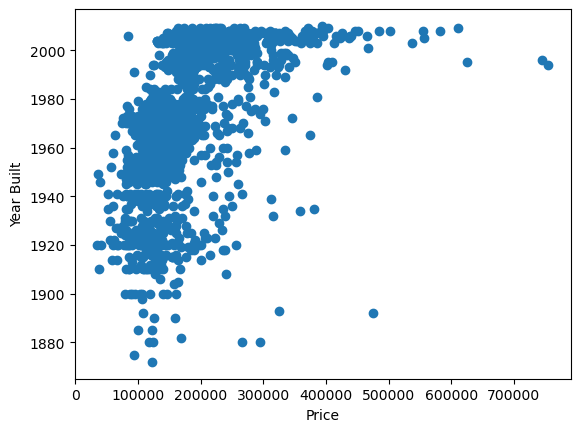

In [22]:
plt.scatter(housing['SalePrice'],housing['YearBuilt'])
plt.xlabel('Price')
plt.ylabel('Year Built');

In [23]:
feature_train = housing[['SalePrice','YearBuilt']]
model_trn = smf.ols(formula='SalePrice~YearBuilt', data=feature_train).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.99e-103
Time:                        05:14:19   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.53e+06   1.16e+05    -21.858      0.000   -2.76e+06    -2.3e+06
YearBuilt   1375.3735     58.717     23.424      0.000    1260.194    1490.553
==============================================================================
Omnibus:                      761.903   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6856.947
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.603   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you can see from the regression model above, the R-squared of Price as a dependent variable to Year Built is explained 27% of the time by this model. The correlation between price and year built is approximately .522 according to pandas. This indicates to me that a strong correlation must exist to create a model that has an R-Squared approaching 1.

## Garage Area

I want to do some exploratory data analysis of some physical features that I would like in a house. Having two small kids, we need a lot of storage space for toys. I want to see how garage area and basement area correlate and can be used to model with respect to price.

In [24]:
housing['SalePrice'].corr(housing['GarageArea'])

0.6234314389183621

Unsurprisingly, a larger area garage corresponds with higher priced homes, with a correlation coefficient of .62. This means they are highly correlated. Let's see the plot to see how the numbers look on a scatter plot.

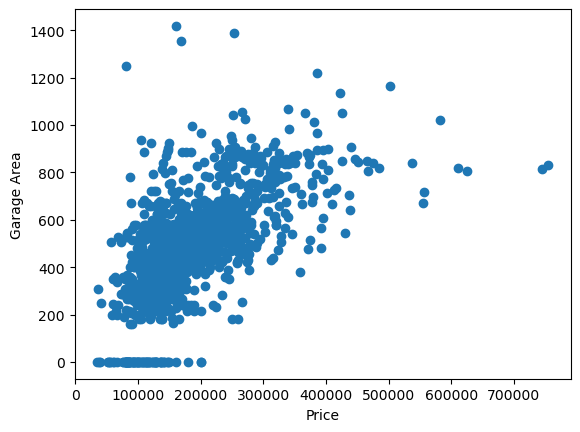

In [25]:
plt.scatter(housing['SalePrice'],housing['GarageArea'])
plt.xlabel('Price')
plt.ylabel('Garage Area');

This indicates to me that the garage area can only be 0 until a certain price house, and then a more expensive house will always have a garage. Let's check how a model using these columns would fare.

In [26]:
feature_train = housing[['SalePrice','GarageArea']]
model_trn = smf.ols(formula='SalePrice~GarageArea', data=feature_train).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Tue, 09 May 2023   Prob (F-statistic):          5.27e-158
Time:                        05:14:20   Log-Likelihood:                -18185.
No. Observations:                1460   AIC:                         3.637e+04
Df Residuals:                    1458   BIC:                         3.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.136e+04   3949.003     18.070      0.000    6.36e+04    7.91e+04
GarageArea   231.6456      7.608     30.446      0.000     216.721     246.570
==============================================================================
Omnibus:                      562.790   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5197.079
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Disappointingly, garage area does not have a high R-Squared, meaning it explains the variability of the dependent variable only 38.9% fo the time. Next we'll explore if basement square footage is a better or worse indicator of price.

## Basement Area

Another good place to store toys is the basement. Let's see how the size of a basement corresponds to price.

In [27]:
housing['SalePrice'].corr(housing['TotalBsmtSF'])

0.6135805515591952

Basement area is comparably correlated with price as garage area. Let's see how the data looks visually, then we'll check the R-Squared.

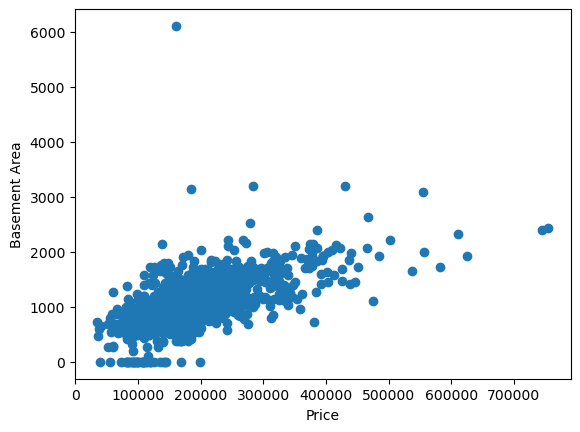

In [28]:
plt.scatter(housing['SalePrice'],housing['TotalBsmtSF'])
plt.xlabel('Price')
plt.ylabel('Basement Area');

Here, there appears to be an outlier where the total basement square footage is over 6000, which is almost double everything else. Although I suspect it is erroneous data, I will leave it because I think the sample size is adequate that a single outlier of this magnitude will not cause issues in the data. I will revisit that consideration later if necessary.

Let's check the regression model next:


In [29]:
feature_train = housing[['SalePrice','TotalBsmtSF']]
model_trn = smf.ols(formula='SalePrice~TotalBsmtSF', data=feature_train).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     880.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          9.48e-152
Time:                        05:14:20   Log-Likelihood:                -18199.
No. Observations:                1460   AIC:                         3.640e+04
Df Residuals:                    1458   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.343e+04   4286.892     14.796      0.000     5.5e+04    7.18e+04
TotalBsmtSF   111.1096      3.745     29.671      0.000     103.764     118.455
==============================================================================
Omnibus:                      386.381   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5810.518
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      12.638   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yet again, the regression model has a low R-Squared. This data only has an R-Squared of .376. It once again leads me to believe that correlation must be extremely strong in order to create a model that highly predicts the variability of the dependent variable, price. 

As an alternative theory, it's possible that it requires looking at multiple factors at once to create a model that has a high R-Squared. This leads me to my choice of model for this project.

# Model (and Some Visualization and Analysis)

For this project, I will be trying multiple linear regression in an attempt to approximate the price of a home. I believe this is a valid approach because I have several medium-high correlated features that I want to explore their interconnectivity to find a model that best predicts price.

In terms of difficulties, there are 28 features and 1 dependent variable, so I need to systematically choose which features to include in my model. To faciliate this, I will use forward stepwise refinement to add features until the R^2 improvement for an additional feature does not justify inclusion of any additional features.

I want to avoid overfitting, so I will first create a model using forward stepwise refinement, and then check it against the test dataset. If the results are poor, I will reassess my inclusion of certain features based on R^2 change between models.

First, we will establish a train and test df, where the training set is 80% of the data, and the test set is 20% of the data

## Collinearity
Because the correlation matrix in the exploratory section above shows that there is not such a strong correlation between features that there would be any issues with *collinearity*, I do not need to do anything to address such a problem.

In [30]:
def fwd_stepwise(df, k, allowed_factors):
    features = []
    temp_allowed_factors = allowed_factors.copy()
    for i in range(k):
        r_sq_dict = {}
        for factor in temp_allowed_factors:
            if len(features) == 0:
                xy = 'SalePrice~{}'.format(factor)
            else:
                xy = 'SalePrice~{}'.format('+'.join(features) + "+" + factor)
            
            model = smf.ols(xy, data = df).fit()

            r_sq_dict[factor] = model.rsquared_adj            
        highest_rsq = max(r_sq_dict, key = r_sq_dict.get)
        features.append(highest_rsq)
        temp_allowed_factors.remove(highest_rsq)
    print ("Identified feature(s): {}".format(features))
    return smf.ols('SalePrice~{}'.format('+'.join(features)), data = df).fit(), features
            

In [31]:
final_features = housing.drop(columns=['SalePrice']).columns.tolist()

In [32]:

model1, model1_features = fwd_stepwise(housing, 15, final_features)

Identified feature(s): ['OverallQual', 'TotalSF', 'GarageCars', 'BsmtFullBath', 'TotalBsmtSF', 'KitchenAbvGr', 'YearBuilt', 'OverallCond', 'LotArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'ScreenPorch', 'WoodDeckSF', 'FirstFlrSF', 'Fireplaces']


In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        05:14:45   Log-Likelihood:                -17367.
No. Observations:                1460   AIC:                         3.477e+04
Df Residuals:                    1444   BIC:                         3.485e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8.482e+05   9.02e+04     -9.405      0.000   -1.03e+06   -6.71e+05
OverallQual   1.751e+04   1165.402     15.026      0.000    1.52e+04    1.98e+04
TotalSF         45.9564      3.978     11.553      0.000      38.153      53.759
GarageCars    1.204e+04   1722.680      6.989      0.000    8660.099    1.54e+04
BsmtFullBath  1.128e+04   1963.621      5.746      0.000    7430.867    1.51e+04
TotalBsmtSF    -30.7513      5.615     -5.477      0.000     -41.765     -19.737
KitchenAbvGr -2.457e+04   4839.828     -5.076      0.000   -3.41e+04   -1.51e+04
YearBuilt      391.8458     45.788      8.558      0.000     302.028     481.663
OverallCond   5651.2572    940.927      6.006      0.000    3805.526    7496.988
LotArea          0.4532      0.102      4.435      0.000       0.253       0.654
BedroomAbvGr -9843.1430   1668.571     -5.899      0.000   -1.31e+04   -6570.060
TotRmsAbvGrd  6064.3990   1229.725      4.932      0.000    3652.160    8476.638
ScreenPorch     50.4628     17.289      2.919      0.004      16.548      84.378
WoodDeckSF      24.6836      8.073      3.057      0.002       8.847      40.520
FirstFlrSF       9.9220      4.776      2.077      0.038       0.553      19.291
Fireplaces    3023.6403   1768.441      1.710      0.088    -445.347    6492.628
==============================================================================
Omnibus:                      567.322   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95617.055
Skew:                          -0.673   Prob(JB):                         0.00
Kurtosis:                      42.623   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
housing1 = housing
housing1['Prediction'] = model1.predict(housing1)
housing1['Error'] = abs(housing1['Prediction'] - housing1['SalePrice'])

In [35]:
print("For context, average SalePrice is:", housing['SalePrice'].mean())

print("Error mean is:", housing1['Error'].mean())
print("Error min is:", housing1['Error'].min())
print("Error max is:", housing1['Error'].max())

For context, average SalePrice is: 180921.19589041095
Error mean is: 21746.880545497723
Error min is: 17.76537466631271
Error max is: 489371.8023098846


## Re-Evaluating:

While the mean Error (Actual Price - Predicted Price) is somewhat good relative to the mean SalePrice, the max error is way too high. Let's look further into this by looking at the higher error range data

In [36]:


housing1.iloc[housing1['Error'].idxmax()]

LotArea           63887.00000
OverallQual          10.00000
OverallCond           5.00000
YearBuilt          2008.00000
TotalBsmtSF        6110.00000
FirstFlrSF         4692.00000
SecondFlrSF         950.00000
LowQualFinSF          0.00000
BsmtFullBath          2.00000
BsmtHalfBath          0.00000
FullBath              2.00000
HalfBath              1.00000
BedroomAbvGr          3.00000
KitchenAbvGr          1.00000
TotRmsAbvGrd         12.00000
Fireplaces            3.00000
GarageCars            2.00000
GarageArea         1418.00000
WoodDeckSF          214.00000
OpenPorchSF         292.00000
EnclosedPorch         0.00000
ThreeSsnPorch         0.00000
ScreenPorch           0.00000
PoolArea            480.00000
MiscVal               0.00000
MoSold                1.00000
YrSold             2008.00000
SalePrice        160000.00000
TotalSF           11752.00000
Prediction       649371.80231
Error            489371.80231
Name: 1298, dtype: float64

The prediction with the max error indicates that there is a 11,752 square foot house that sold for $160,000. That house is also has an area of nearly 64,000 square feet. Something seems amiss, as if we missed an outlier and need to reexamine our data cleaning. Let's take a look at the LotArea:Price plot

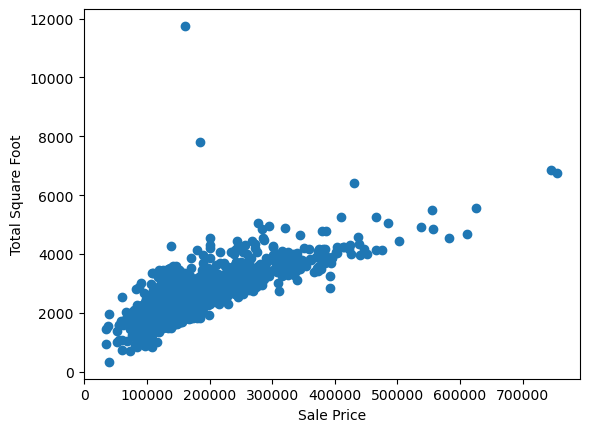

In [37]:
plt.scatter(housing1['SalePrice'], housing1['TotalSF'])
plt.xlabel("Sale Price")
plt.ylabel("Total Square Foot");

Let's use leverage and residiual to remove outliers:


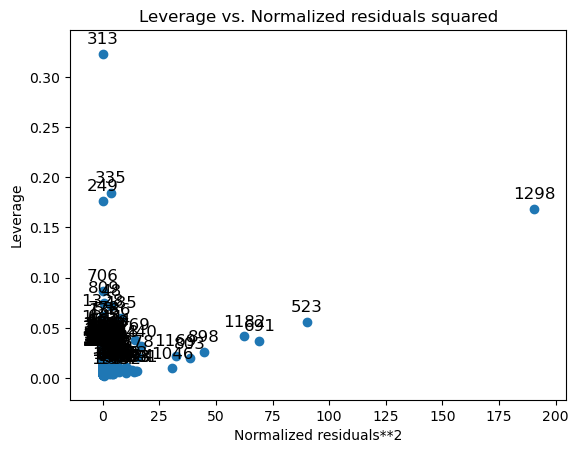

In [38]:
sm.graphics.plot_leverage_resid2(model1, alpha = 0.05);

In [39]:
housing = housing.drop([313,335,249,523,1298])
housing2 = housing

Because the confidence interval of Fireplaces contains 0, I will remove that from the feature list for model 1 and try again.

In [40]:
model1_features.remove('Fireplaces')


In [41]:

model2 =  smf.ols('SalePrice~{}'.format('+'.join(model1_features)), data = housing2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     586.6
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        05:14:46   Log-Likelihood:                -17095.
No. Observations:                1455   AIC:                         3.422e+04
Df Residuals:                    1440   BIC:                         3.430e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.254e+05    7.8e+04    -11.860      0.000   -1.08e+06   -7.72e+05
OverallQual    1.48e+04   1014.594     14.583      0.000    1.28e+04    1.68e+04
TotalSF         67.1904      3.537     18.996      0.000      60.252      74.129
GarageCars    7116.3368   1508.133      4.719      0.000    4157.964    1.01e+04
BsmtFullBath  1.061e+04   1697.637      6.248      0.000    7276.761    1.39e+04
TotalBsmtSF    -34.8138      4.809     -7.240      0.000     -44.246     -25.381
KitchenAbvGr -2.522e+04   4142.496     -6.087      0.000   -3.33e+04   -1.71e+04
YearBuilt      430.7564     39.586     10.882      0.000     353.105     508.408
OverallCond   6431.6295    814.202      7.899      0.000    4834.481    8028.778
LotArea          1.1529      0.149      7.735      0.000       0.861       1.445
BedroomAbvGr  -1.37e+04   1446.352     -9.471      0.000   -1.65e+04   -1.09e+04
TotRmsAbvGrd  4128.0909   1067.371      3.868      0.000    2034.323    6221.859
ScreenPorch     30.7246     14.827      2.072      0.038       1.640      59.810
WoodDeckSF      12.1156      7.076      1.712      0.087      -1.765      25.997
FirstFlrSF       3.7740      4.124      0.915      0.360      -4.315      11.863
==============================================================================
Omnibus:                      599.458   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7396.428
Skew:                           1.569   Prob(JB):                         0.00
Kurtosis:                      13.590   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So by dropping four highly leveraged vs. residual rows from the plot, and removing Fireplaces, the R^2 improved by 0.05. Let's check our error rate again

In [42]:
housing2['Prediction'] = model2.predict(housing2)
housing2['Error'] = abs(housing2['Prediction'] - housing2['SalePrice'])

print("Error mean is:", housing2['Error'].mean())
print("Error min is:", housing2['Error'].min())
print("Error max is:", housing2['Error'].max())

Error mean is: 20938.85544361181
Error min is: 26.75521284592105
Error max is: 244507.88423906313


The mean error went down, but there is still a significantly large max error. Let's see how many rows have an error rate that exceeds $100,000

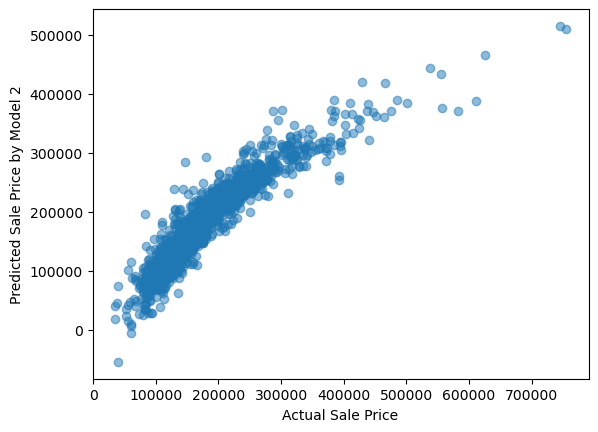

In [43]:
plt.scatter(housing2['SalePrice'], housing2['Prediction'], alpha = 0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price by Model 2")
plt.show()

In [44]:
housing2[housing2['Error'] > 100000]

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,Prediction,Error
66,19900,7,5,1970,1947,2207,0,0,1,0,...,0,0,0,0,7,2010,180000,4154,292583.198041,112583.198041
178,17423,9,5,2008,2216,2234,0,0,1,0,...,0,0,0,0,7,2009,501837,4450,385433.996060,116403.003940
185,22950,10,9,1892,1107,1518,1518,572,0,0,...,0,410,0,0,6,2006,475000,4143,370920.585936,104079.414064
440,15431,10,5,2008,3094,2402,0,0,1,0,...,0,170,0,0,4,2009,555000,5496,433935.020237,121064.979763
473,14977,8,5,2006,1976,1976,0,0,1,0,...,0,0,0,0,7,2007,440000,3952,321952.558728,118047.441272
632,11900,7,5,1977,1386,1411,0,0,0,0,...,0,0,0,0,4,2009,82500,2797,195668.653086,113168.653086
666,18450,6,5,1965,1021,1465,915,0,0,0,...,0,0,0,0,8,2007,129000,3401,238551.387797,109551.387797
688,8089,8,6,2007,1419,1419,0,0,1,0,...,0,0,0,0,10,2007,392000,2838,254863.648771,137136.351229
691,21535,10,6,1994,2444,2444,1872,0,0,1,...,0,0,0,0,1,2007,755000,6760,510492.115761,244507.884239
803,13891,9,5,2008,1734,1734,1088,0,0,0,...,0,192,0,0,1,2009,582933,4556,370590.400287,212342.599713


## Re-Evaluating Part 2:

The error still seems high, so this time I will try to do a multilinear model with interactions to see if that yields a better R^2. I'll start with developing a new forward stepwise refinement function with full interactions to see at what point I reach a diminishing R^2

In [45]:
def fwd_stepwise_interactions(df, k, allowed_factors):
    features = []
    temp_allowed_factors = allowed_factors.copy()
    for i in range(k):
        r_sq_dict = {}
        for factor in temp_allowed_factors:
            if len(features) == 0:
                xy = 'SalePrice~{}'.format(factor)
            else:
                xy = 'SalePrice~{}'.format('*'.join(features) + "*" + factor)
            
            model = smf.ols(xy, data = df).fit()
            
            r_sq_dict[factor] = model.rsquared_adj
            if i == k-1:
                print(xy)
                print(model.rsquared_adj)                
        highest_rsq = max(r_sq_dict, key = r_sq_dict.get)
        features.append(highest_rsq)
        temp_allowed_factors.remove(highest_rsq)
    print ("Identified feature(s): {}".format(features))
    return smf.ols('SalePrice~{}'.format('*'.join(features)), data = df).fit(), features

In [46]:
housing3 = housing
model3, model3_features = fwd_stepwise_interactions(housing3, 8, final_features)
# print(model3)

SalePrice~TotalSF*OverallQual*GarageCars*LotArea*YearBuilt*OverallCond*BsmtFullBath*TotalBsmtSF
0.9322065264292919
SalePrice~TotalSF*OverallQual*GarageCars*LotArea*YearBuilt*OverallCond*BsmtFullBath*FirstFlrSF
0.925896949165606
SalePrice~TotalSF*OverallQual*GarageCars*LotArea*YearBuilt*OverallCond*BsmtFullBath*SecondFlrSF
0.9285808389563801
SalePrice~TotalSF*OverallQual*GarageCars*LotArea*YearBuilt*OverallCond*BsmtFullBath*LowQualFinSF
0.9173815961964892
SalePrice~TotalSF*OverallQual*GarageCars*LotArea*YearBuilt*OverallCond*BsmtFullBath*BsmtHalfBath
0.9175595082808096
SalePrice~TotalSF*OverallQual*GarageCars*LotArea*YearBuilt*OverallCond*BsmtFullBath*FullBath
0.9222085938995397
SalePrice~TotalSF*OverallQual*GarageCars*LotArea*YearBuilt*OverallCond*BsmtFullBath*HalfBath
0.9273782501811739
SalePrice~TotalSF*OverallQual*GarageCars*LotArea*YearBuilt*OverallCond*BsmtFullBath*BedroomAbvGr
0.9246230277165086
SalePrice~TotalSF*OverallQual*GarageCars*LotArea*YearBuilt*OverallCond*BsmtFullBath*K

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     121.4
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        05:19:09   Log-Likelihood:                -16433.
No. Observations:                1455   AIC:                         3.320e+04
Df Residuals:                    1288   BIC:                         3.408e+04
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                 0.0027      0.005      0.548      0.584      -0.007       0.012
TotalSF                                                                                   1.0972      0.483      2.272      0.023       0.150       2.044
OverallQual                                                                              -0.3092      0.115     -2.685      0.007      -0.535      -0.083
TotalSF:OverallQual                                                                       7.4220      3.941      1.883      0.060      -0.310      15.154
GarageCars                                                                                0.1215      0.072      1.686      0.092      -0.020       0.263
TotalSF:GarageCars                                                                       -0.2448      0.464     -0.527      0.598      -1.156       0.666
OverallQual:GarageCars                                                                   -0.0337      0.028     -1.211      0.226      -0.088       0.021
TotalSF:OverallQual:GarageCars                                                           -2.1788      1.880     -1.159      0.247      -5.866       1.508
LotArea                                                                                   0.2181      0.705      0.309      0.757      -1.165       1.602
TotalSF:LotArea                                                                          -2.7274      0.913     -2.987      0.003      -4.519      -0.936
OverallQual:LotArea                                                                       2.6661      1.864      1.430      0.153      -0.991       6.323
TotalSF:OverallQual:LotArea                                                               0.4283      0.160      2.676      0.008       0.114       0.742
GarageCars:LotArea                                                                        1.9380      1.248      1.552      0.121      -0.511       4.387
TotalSF:GarageCars:LotArea                                                                1.2274      0.469      2.620      0.009       0.308       2.147
OverallQual:GarageCars:LotArea                                                           11.2351      4.317      2.603      0.009       2.767      19.704
TotalSF:OverallQual:GarageCars:LotArea                                                   -0.1883      0.079     -2.397      0.017      -0.342      -0.034
YearBuilt                                                                                 3.5046      5.044      0.695      0.487      -6.391      13.401
Tot

In [48]:
housing3['Prediction'] = model3.predict(housing3)
housing3['Error'] = abs(housing3['Prediction'] - housing3['SalePrice'])

print("Error mean is:", housing3['Error'].mean())
print("Error min is:", housing3['Error'].min())
print("Error max is:", housing3['Error'].max())

Error mean is: 13790.782665606646
Error min is: 10.382218942453619
Error max is: 130706.35117935383


## Re-Evaluating Part 3:
While model 3 is incredibly complex because the features are engineered to interact, this is an overly complex model with a poor p-value, which indicates that those interaction features do not have an effect on the prediction. Below, I will create a model 4, which is focused on the interactions with a low p-value from model 3 to see how it performs.

In [49]:
housing4 = housing
model4 = smf.ols('SalePrice~TotalSF + TotalSF:LotArea + TotalSF:GarageCars:LotArea + TotalSF:YearBuilt + TotalSF:LotArea:YearBuilt + TotalSF:GarageCars:LotArea:YearBuilt', data = housing4).fit()

In [50]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1122.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        05:19:09   Log-Likelihood:                -17220.
No. Observations:                1455   AIC:                         3.445e+04
Df Residuals:                    1448   BIC:                         3.449e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             2.261e+04   3642.664      6.206      0.000    1.55e+04    2.98e+04
TotalSF                               -592.4041     51.969    -11.399      0.000    -694.346    -490.462
TotalSF:LotArea                          0.0548      0.008      6.593      0.000       0.038       0.071
TotalSF:GarageCars:LotArea              -0.0183      0.003     -6.988      0.000      -0.023      -0.013
TotalSF:YearBuilt                        0.3296      0.026     12.605      0.000       0.278       0.381
TotalSF:LotArea:YearBuilt            -2.838e-05   4.22e-06     -6.726      0.000   -3.67e-05   -2.01e-05
TotalSF:GarageCars:LotArea:YearBuilt  9.651e-06   1.33e-06      7.259      0.000    7.04e-06    1.23e-05
==============================================================================
Omnibus:                      251.913   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2364.257
Skew:                           0.509   Prob(JB):                         0.00
Kurtosis:                       9.161   Cond. No.                     7.43e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
housing4['Prediction'] = model4.predict(housing4)
housing4['Error'] = abs(housing4['Prediction'] - housing4['SalePrice'])

print("Error mean is:", housing4['Error'].mean())
print("Error min is:", housing4['Error'].min())
print("Error max is:", housing4['Error'].max())

Error mean is: 22895.345972289444
Error min is: 2.5323698294814676
Error max is: 234057.34752120683


## Machine Learning Feature Selection


### Data Preparation:

In [52]:
housingML = housing
# train_df = train_df.drop(['Prediction', 'Error'], axis=1)

In [53]:

y = housingML['SalePrice']
X = housingML.drop('SalePrice', axis=1)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 100)

In [55]:
X_train

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,Prediction,Error
518,9531,6,5,1998,794,882,914,0,1,0,...,0,0,0,0,0,5,2007,2590,194226.950796,16773.049204
512,9100,5,5,1958,864,864,0,0,1,0,...,0,0,0,0,0,7,2006,1728,120029.213419,9870.786581
1262,11250,4,5,1957,1104,1104,684,0,1,0,...,0,0,0,0,0,11,2009,2892,168209.356593,6709.356593
1253,17542,7,7,1974,1192,1516,651,0,1,0,...,0,0,0,0,0,7,2007,3359,231820.848119,62179.151881
618,11694,9,5,2007,1822,1828,0,0,0,0,...,0,0,260,0,0,7,2007,3650,317605.531535,2792.531535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,9750,5,5,1967,980,980,0,0,0,0,...,0,0,0,0,0,10,2006,1960,124760.214764,10739.785236
53,50271,9,5,1981,1842,1842,0,0,2,0,...,0,0,0,0,0,11,2006,3684,428497.972219,43497.972219
353,8520,6,8,1928,624,720,0,0,0,0,...,0,0,0,0,0,5,2010,1344,87916.519962,17983.480038
79,10440,5,6,1910,440,682,548,0,0,0,...,128,0,0,0,0,5,2009,1670,98782.841709,11217.158291


In [56]:
X_test

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,Prediction,Error
531,6155,6,8,1920,611,751,611,0,0,0,...,84,0,0,0,0,6,2008,1973,111132.465807,16867.534193
434,1890,4,7,1972,630,630,0,0,1,0,...,0,0,0,0,0,6,2008,1260,92241.534733,11241.534733
1030,7082,5,8,1916,686,948,980,0,0,0,...,228,0,0,0,0,7,2006,2614,131748.990997,28251.009003
673,14442,6,7,1957,1477,1839,0,0,1,0,...,0,0,200,0,0,6,2007,3316,215576.883182,41923.116818
1185,9738,5,7,1924,784,949,272,0,1,0,...,236,0,0,0,0,3,2006,2005,114426.664948,9526.664948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,6853,8,5,2001,1267,1296,0,0,1,0,...,0,0,0,0,0,6,2009,2563,194400.623034,25599.376966
896,8765,4,6,1936,951,951,0,0,0,0,...,0,0,0,0,0,4,2006,1902,112714.627281,6214.627281
470,6820,8,5,1985,1488,1502,0,0,1,0,...,0,0,140,0,0,6,2010,2990,210218.631876,1781.368124
610,11050,9,5,2000,1440,1476,677,0,1,0,...,0,0,0,0,0,5,2009,3593,302231.633450,10768.366550


### ML Model Building

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

#### Model Performance

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [61]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_test_mean_abs_error = mean_absolute_error(y_test, y_lr_test_pred)


In [62]:
print("Train MSE:", lr_train_mse)
print("Train R^2:", lr_train_r2)
print("Test MSE:", lr_test_mse)
print("Test R^2:", lr_test_r2)
print("Test Mean Absolute Error:", lr_test_mean_abs_error)

Train MSE: 684816511.6531035
Train R^2: 0.8932166510050815
Test MSE: 639885004.0358202
Test R^2: 0.8896066803398551
Test Mean Absolute Error: 18443.645870052074


### Cross-Validation

To confirm that this random sampling is not an error, I will iterate the cross valiidation score 30 times to find the mean absolute error to see if the ML model is superior to the models using by statsmodel (models 1-4)

In [63]:
cv_score = cross_val_score(lr, X, y, cv=30, scoring="neg_mean_absolute_error")

In [64]:
cv_score = -cv_score

In [65]:
np.mean(cv_score)

18850.561490514265

# Results and Analysis

Many of the metrics are discussed in the previous section, but this is an elaboration of that for clarity for the grading rubric.

The models above all have their benefits and detriments. Model 2 (an improvement of Model 1) is simple and has a relatively good average error rate. The mean error is $21746.88, which isn't too bad, but the max error is extremely high. 

Model 3 is extremely complex and has too many interactions between features that have a high p-value.  

Model 4, which attempts to take the lowest p-value interactions from Model 3, performs worst, indicating that the interactions are not necessarily predictive of the Sale Price.

Finally, the machine learning implementation has an r^2 somewhere in the middle of the pack, as is the mean absolute error. It seemed to be in the middle of the pack for performance metrics.

Ideally, a scatter plot would show conformity with a straight 45 degree line if the model performed perfectly (or nearly perfectly). We'll see below which predictions are closest to a linear regression line, and which fail to do so.

## Model 2 (Improvement Upon Model 1)

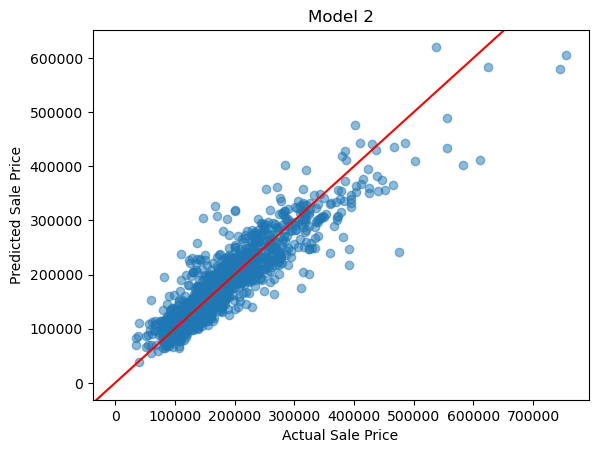

In [66]:
plt.scatter(housing2['SalePrice'], housing2['Prediction'], alpha = 0.5)
plt.axline([0, 0], [1, 1], color='red')
plt.title("Model 2")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

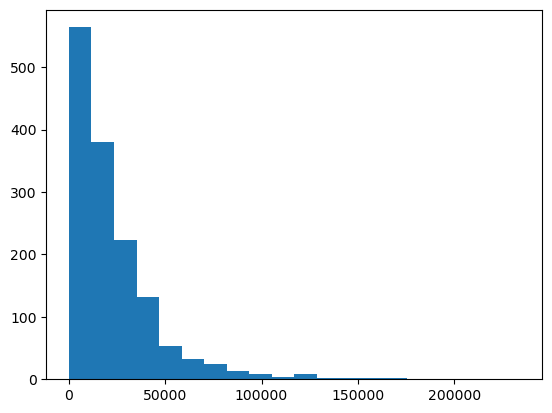

In [67]:
plt.hist(housing2['Error'], bins=20);

Model 2 few errors above the $100,000 mark, but does have a spike near $125,000 in the histogram, indicating that it is not resistant to outliers. It is also not tightly bound around the linear regression line, which indicates that, while the average error is decent, it is erratic and scattered. This model is not strongly representative of a linear regression line.

## Model 3

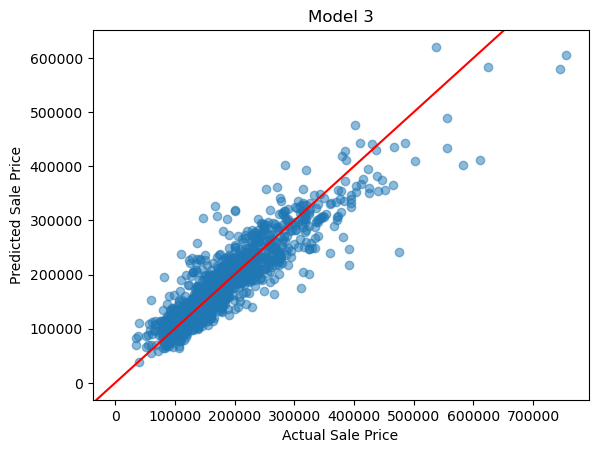

In [68]:
plt.scatter(housing3['SalePrice'], housing3['Prediction'], alpha = 0.5)
plt.axline([0, 0], [1, 1], color='red')
plt.title("Model 3")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

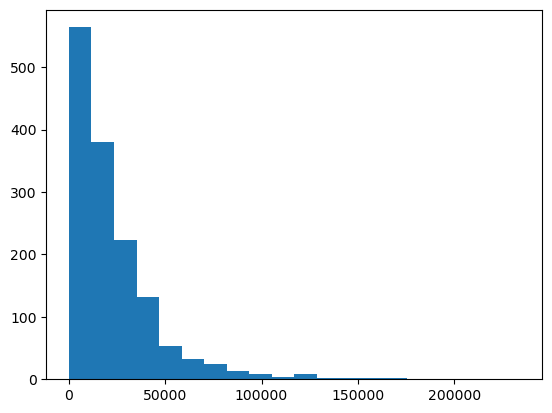

In [69]:
plt.hist(housing3['Error'], bins=20);

Model 3 has is an improvement from model 2, because the error is more highly concentrated around the 0-25,000 error mark. There is another bump around the $125,000 error mark, which indicates it does not account for outlier situations. Furthermore, the scatter plot is not tightly bound to the linear regression line, with many data points distant from the regression line as the price gets larger.

## Model 4

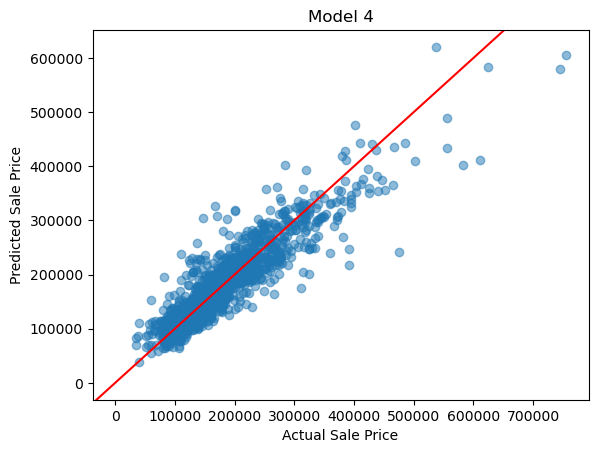

In [70]:
plt.scatter(housing4['SalePrice'], housing4['Prediction'], alpha = 0.5)
plt.axline([0, 0], [1, 1], color='red')
plt.title("Model 4")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

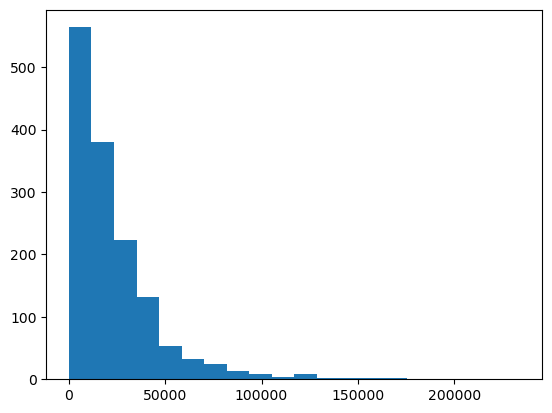

In [71]:
plt.hist(housing4['Error'], bins=20);

Model 4 appears more scattered than other models around the regression line in the scatter plot, which indicates this model is more unpredictable and not good. Simply put, because of the R^2 score, it is clearly not a great candidate to use to predict sale price because it is too erratic.

## ML Model

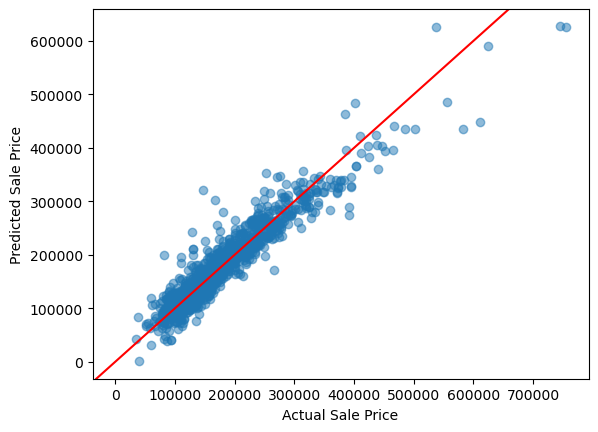

In [72]:
plt.scatter(y_train, y_lr_train_pred, alpha = 0.5)
plt.axline([0, 0], [1, 1], color='red')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

In [73]:
print("Train MSE:", lr_train_mse)
print("Train R^2:", lr_train_r2)
print("Test MSE:", lr_test_mse)
print("Test R^2:", lr_test_r2)
print("Test Mean Absolute Error:", lr_test_mean_abs_error)

Train MSE: 684816511.6531035
Train R^2: 0.8932166510050815
Test MSE: 639885004.0358202
Test R^2: 0.8896066803398551
Test Mean Absolute Error: 18443.645870052074


Although the r^2 is not the highest for this model, it is clearly the tightest bound to the linear regression line in the scatter plot above. The mean absolute error is also on par with the best other performing model, model 3, but it does not seem to suffer from the complexity of model 3's interactions, nor does it appear erratic around the linear regression line. This model is the most consistent in terms of performance despite it having a higher mean error.

## Suggestions for Improvements

If I could improve this project, I would focus on using categorical/discrete variables as well as continuous variables. It appears there is a missing element in this data set, and I wish I all the time in the world to improve the model by exploring the categorical variables as well. Things that initially seemed unimportant, like a subclass or zoning class may be pertinent to price understanding. I cut 79 explanatory variables down to 29. I feel certain that some were redundant, and I was able to perform feature engineering to synthesize some of the data (such as creating a total house square footage since there was no square footage for the entire house as it was broken out by floor). But, I would be interested in how to a categorical explanatory variable could be coupled with a continuous categorical variable to create a better model, and I will strive to use categorical variables more in the future.


# Conclusion

I feel like I could feasibly use model 3 and the ML model to anticipate price of a home in the same area if I was in the market for a home. If I had to rely on just one model, I would use the machine learning model because it is more tightly bound, on average to the actual sale price of the home. The machine learning model had the second-best mean performance, and the scatter plot certaintly showed it was consistently close to the linear regression line, which makes me feel that it handles variations in features best.